### PREDICTING H1N1 FLU VACCINATION STATUS USING MACHINE LEARNING


## 1. Business Understanding

### 1.1 Overview

In this project, the aim was to use data from the National Flu Survey (NHFS 2009) to predict whether respondents received the H1N1 vaccine. Understanding past vaccination trends is crucial for interpreting patterns in more recent pandemics, such as COVID-19. Key factors influencing vaccination status include Doctor recommendations for the H1N1 vaccine,health insurance, opinions on the vaccine's effectiveness perceptions of the risk posed by H1N1.
I employed six machine learning models for prediction: 

1.Decision Tree Classifier

2.Logistic Regression

3.Random Forest

4.K-Nearest Neighbors Classifier

5.Gradient Boosting Classifier

6.XGBoost Classifier

Among these, the Gradient Boosting Classifier achieved the highest accuracy and precision.

## 1.2 Business Problem.

Vaccination stands as one of the most effective public health interventions ever implemented, leading to the elimination and control of diseases that were once widespread globally. Despite substantial medical evidence and the strong consensus among healthcare professionals supporting vaccination, skepticism has increased in many countries in recent years. This troubling trend has resulted in decreased immunization coverage, with several outbreaks of infectious diseases linked to undervaccinated communities. The growing issue of vaccine hesitancy has become so pervasive that it is now the subject of numerous studies aiming to understand the sources and correlations of attitudes toward vaccination.

This study aims to predict the likelihood of individuals receiving the H1N1 flu vaccine. We believe the predictive models and analyses from this study will provide public health professionals and policymakers with a clear understanding of the factors associated with low vaccination rates. This, in turn, will enable them to systematically address the barriers preventing people from getting vaccinated.

The methodologies employed in these models can serve as a reference for future work and can be compared with other models for performance evaluation. Given the nature of our data and our objectives, we implemented multiple machine learning classification models, including Logistic Regression, Decision Tree, Random Forest, k-Nearest Neighbors (kNN), Gradient Boosting, and XGBoost.

To accurately classify those who received the H1N1 flu shot from those who did not, we require models with high accuracy and high precision, which corresponds to a low false positive rate (those mistakenly identified as vaccinated when they were not). This will be further evaluated using the ROC curve, accuracy score, precision score, and confusion matrix.

**Target Audience**: Public health officials of the American Public Health Association (APHA)

**OBJECTIVES**:
1. Predicting who is vaccinated or not accurately.(Deliverable: Model)
2. Analyse the factors that influence people to get H1N1 vaccine or not.  (Deliverable: Analysis)

**Context**:
- False negative: Saying people did not get the vaccine when they actually did. 
- Outcome: Not a big problem

- False positive: Saying people got the vaccine when they actually did not. 
- Outcome: Big problem


**Evaluation**:
We will focus on accuracy, f1, and precision scores for our model iterations in order to minimize False Positives, because in our business context false positives are a much more costly mistake than false negatives.

- **Accuracy**
- **Precision**
- Recall
- **F1-Score**


## 2. Data Understanding

### 2.1  Import Libraries

In [5]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model training

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

# Libraries for algorithm

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


import xgboost     # extreme gradient boosting

# Libraries for testing

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

### 2.2 Load Dataset

This data comes from a NHFS National Flu Survey from 2009, which inquires about whether or not people received the seasonal flu and/or the H1N1 flu vaccination, as well as their demographic, behavioral, and health factors. There are 26,000 respondents to this survey. In this project I chose H1N1 vaccination rate as our target variable.I used all features in the survey, and filled missing values using the Iterative Imputer. 

In [6]:
# Reading in the data and previewing the dataset
Data1 = pd.read_csv('DATA/H1N1_Flu_Vaccines.csv')
Data1.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [24]:
#dataset tail
Data1.tail(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


### 2.3 Checking the Dataset

In [7]:
#Determining the no. of records in our dataset
Data1.shape

(26707, 38)

In [8]:
# Exploring the percentage breakdown of the two classes in one possible target (seasonal flu rate)
Data1['seasonal_vaccine'].value_counts(normalize=True) 

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

In [9]:
# Exploring the percentage breakdown of the two classes in one possible target (H1N1 flu rate)
Data1['h1n1_vaccine'].value_counts(normalize=True)   # class imbalance problem

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [10]:
# checking dataset information
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
Data1.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [12]:
# Getting number of null values
Data1.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [13]:
# Explore numerical columns
Data1.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [14]:
# Explore object columns
Data1[[c for c in Data1.columns if Data1[c].dtype =='object']].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


I decided to choose the H1N1 vaccination rate as our target variable, because so many of the features are related to H1N1 vaccination. 

## 3. EDA 
### (initial EDA before cleaning)

How many people got the H1N1 and Flu vaccine - from the given data set

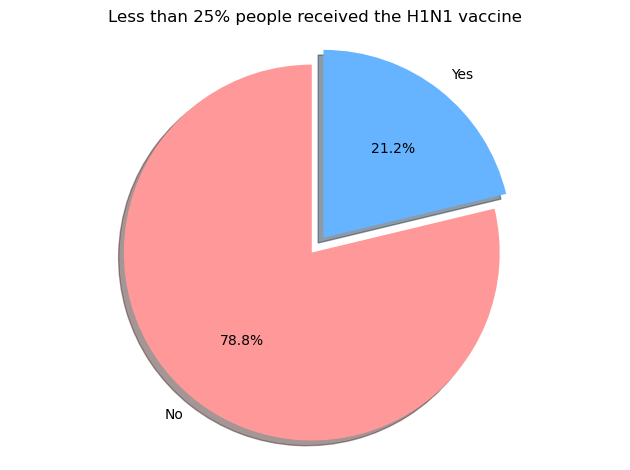

In [15]:
## for the H1N1 vaccine 
fig1, ax1 = plt.subplots()
labels = ['No','Yes']
explode = (0,0.1)
colors = ['#ff9999','#66b3ff']
ax1.pie(Data1['h1n1_vaccine'].value_counts(), explode=explode, labels=labels,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Less than 25% people received the H1N1 vaccine")
ax1.axis('equal')
plt.tight_layout()
plt.savefig("H1n1pie")
plt.show()

Observation - There is a class imbalance in the adoption of the H1N1 vaccine. (less than 25% of the people chose to receive the H1N1 vaccine). This might help in future during the analysis.This  class imbalance problem is what we want to deal with in this project.

The following visualizations represent the top four most influential features in determining vaccination status for H1N1.

In [16]:
# Making a copy of main dataframe to use for visualizations
Data2 = Data1.copy()

In [17]:
# Creating dictionary for mapping in order to create better names for x axis in graphs below
ins_dict = {1: 'Health Insurance', 0: 'No Health Insurance'}
# Creating the column that will be used to create clear x axis tick marks in graph below
Data2['health_ins_words'] = Data2['health_insurance'].replace(ins_dict)


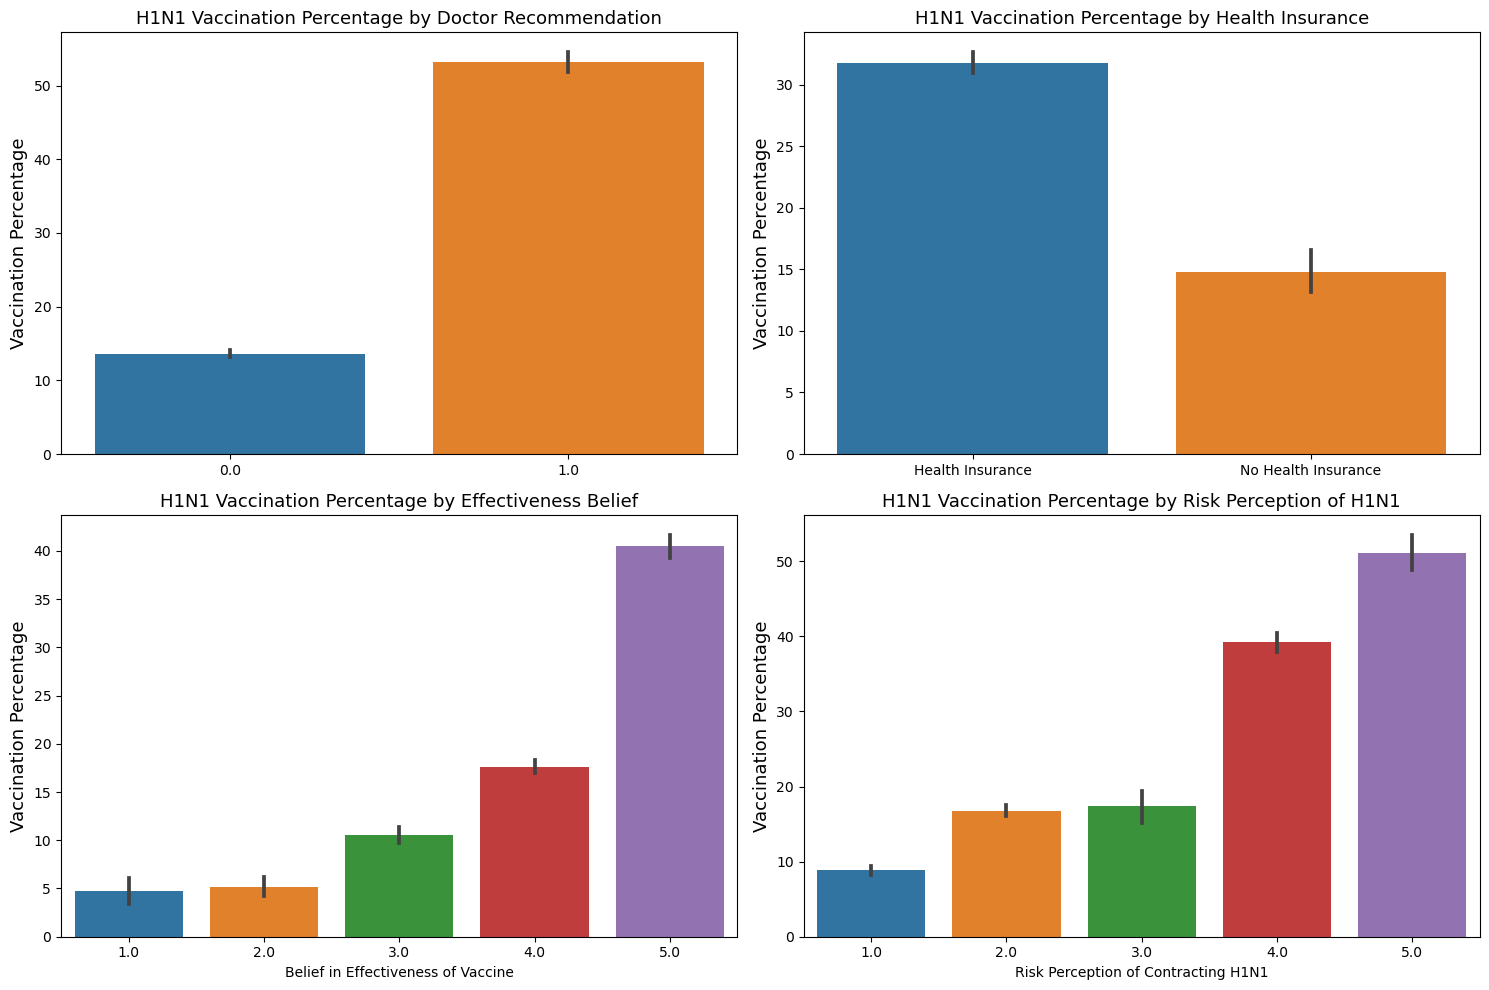

In [20]:


def plot_bar(df, x_col, y_col, ax, xlabel, ylabel, title):
    """
    This function plots a bar chart on a given axis.
    """
    sns.barplot(x=df[x_col].dropna(), y=df[y_col]*100, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_title(title, fontsize=13)

def plot_vaccination_graphs(Data2):
    """
    This function takes a dataframe and plots four bar charts in a 2x2 layout 
    showing the relationship between H1N1 vaccination and various factors.
    """
    # Making a copy of the main dataframe to use for visualizations
    Data2 = Data1.copy()

    # Creating dictionary for mapping in order to create better names for x axis in graphs below
    ins_dict = {1: 'Health Insurance', 0: 'No Health Insurance'}
    # Creating the column that will be used to create clear x axis tick marks in graph below
    Data2['health_ins_words'] = Data2['health_insurance'].replace(ins_dict)

    # Setting up the 2x2 subplot layout
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Plotting the individual bar charts
    plot_bar(Data2, 'doctor_recc_h1n1', 'h1n1_vaccine', axs[0, 0], '', 'Vaccination Percentage', 'H1N1 Vaccination Percentage by Doctor Recommendation')
    plot_bar(Data2, 'health_ins_words', 'h1n1_vaccine', axs[0, 1], '', 'Vaccination Percentage', 'H1N1 Vaccination Percentage by Health Insurance')
    plot_bar(Data2, 'opinion_h1n1_vacc_effective', 'h1n1_vaccine', axs[1, 0], 'Belief in Effectiveness of Vaccine', 'Vaccination Percentage', 'H1N1 Vaccination Percentage by Effectiveness Belief')
    plot_bar(Data2, 'opinion_h1n1_risk', 'h1n1_vaccine', axs[1, 1], 'Risk Perception of Contracting H1N1', 'Vaccination Percentage', 'H1N1 Vaccination Percentage by Risk Perception of H1N1')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_vaccination_graphs(Data2)


In [21]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

### 4. Data Preparation (Data Cleaning)

There were a few changes we made to the data set. 
1. First, we dropped the "respondent_id" and "seasonal_vaccine" columns because they were not relevant for our purposes. 

2. We also added columns due to categorical columns that we transformed with OneHotEncoder.

3. We also filled null values with Iterative Imputer, which was a better alternative to simple imputer for our dataset. 

4. We replaced category names with frequency counts with CountEncoder for the columns which had more than 10 unique categories.

5.  We used pipelines to make preprocessing and modelling more efficient, and also to prevent data leakage. 

6. We also decided to split training and testing data twice so that we could have a holdout set to test our final model's generalizability at the end.

In [25]:
# Define our X and y
X = Data1.drop(columns = ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = Data1['h1n1_vaccine']

I chose 80%, 20% for train and validation. Also set the 

In [ ]:
# Train - Holdout Set Split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)